In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from random import *

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:


class Mnist(nn.Module):

    def __init__(self):
        super(Mnist, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x
    
net = Mnist()
print(net)


Mnist(
  (fc1): Linear(in_features=784, out_features=100)
  (fc2): Linear(in_features=100, out_features=10)
)


## Test our network with random data and get it to learn something

In [3]:
input = Variable(torch.randn(1, 1, 784))
target = Variable(torch.arange(1, 11))  

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss)
loss.backward() # calculate gradient
optimizer.step() # update weight


before optimize Variable containing:
 33.1449
[torch.FloatTensor of size 1]



In [4]:
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss) # it number is smaller than before, therefore the network is learning something


after optimize Variable containing:
 32.8418
[torch.FloatTensor of size 1]



In [5]:
#we can trace the loss.grade_fn backwards through the network.
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")


In [7]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [8]:
len(mnist.data)

70000

In [9]:
len(mnist.target)

70000

In [10]:
len(mnist.data[0])

784

(array([ 6903.,  7877.,  6990.,  7141.,  6824.,  6313.,  6876.,  7293.,
        13783.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

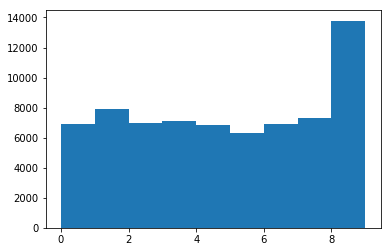

In [11]:
plt.hist(mnist.target, bins=range(10))

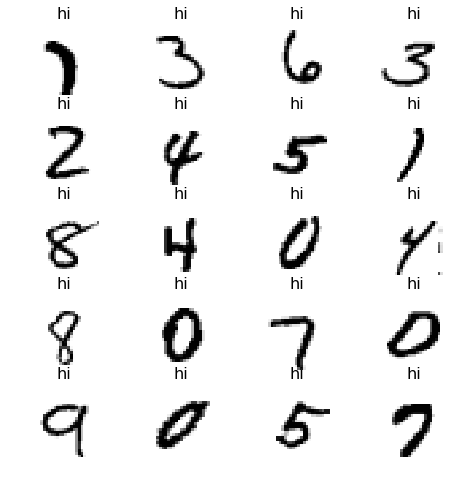

In [18]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img =  mnist.data[randint(0, 70000)].reshape((28,28))
    sp = fig.add_subplot(rows, columns , i)
    sp.axis('Off')
    sp.set_title('hi', fontsize=16)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray_r')



In [8]:
x = np.random.permutation(70000)

In [9]:
training_data_index = x[:50000]
validation_data_index = x[50000:60000]
test_data_index = x[60000:]

In [10]:
bs = 5
bs_data_index = training_data_index[:3]
bs_data_index

array([43900, 34921, 20914])

In [29]:
net( tourch.array(mnist.data[0]).reshape((1,1,28,28)))

NameError: name 'tourch' is not defined

In [26]:
len(mnist.data[0])

784

In [27]:
28*28

784

In [46]:
input_tensor = torch.from_numpy(np.array(mnist.data[0]).reshape(1,1,784))
net( torch.autograd.Variable(input_tensor).type(torch.FloatTensor) )

Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.3778  0.5881  0.5146  0.5060  0.4119  0.4137  0.4934  0.4969  0.5159

Columns 9 to 9 
   0.4719
[torch.FloatTensor of size 1x1x10]